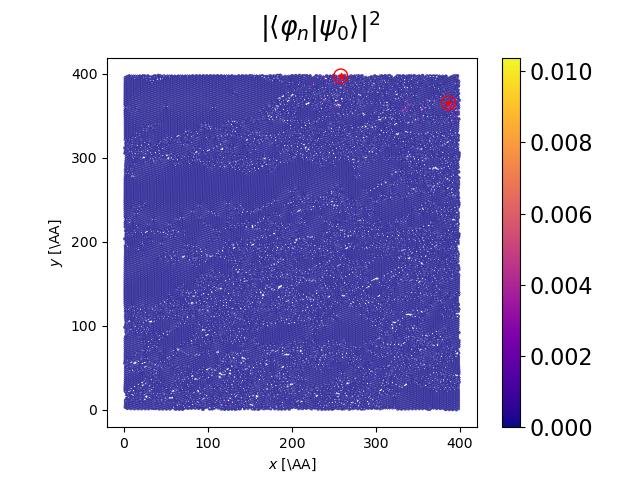

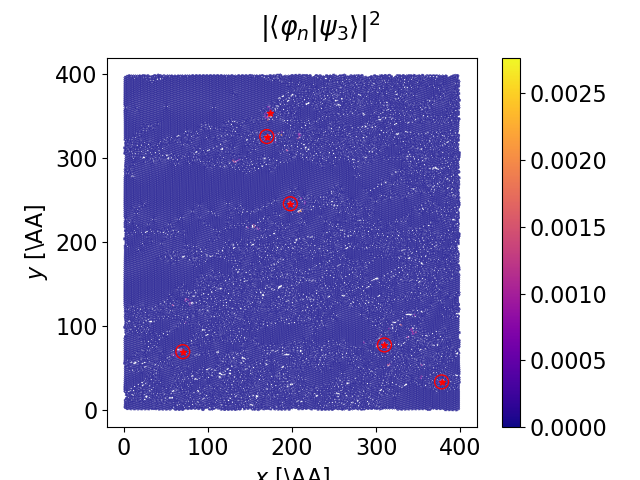

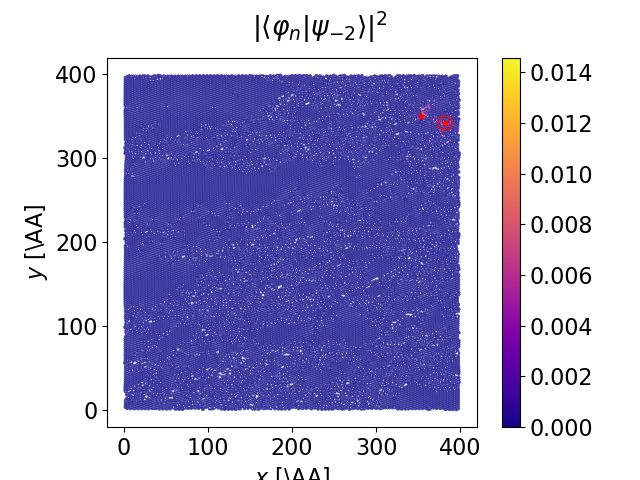

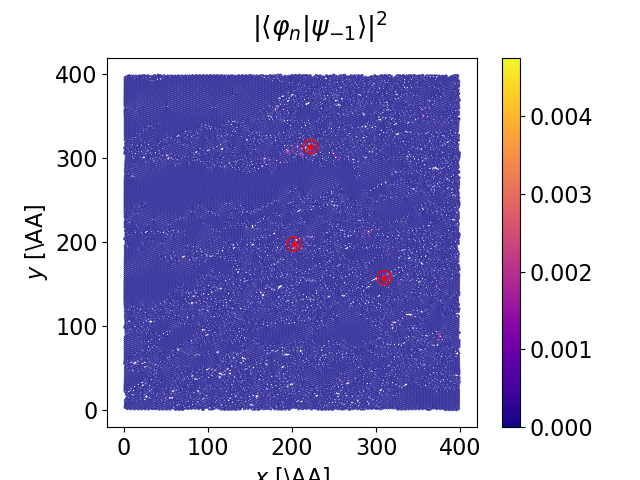

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from qcnico.qcplots import plot_atoms, plot_MO
from qcnico.coords_io import read_xsf
from MOs2sites import get_MO_loc_centers_opt, clean_centers

nsample = 127

percdir = f'/Users/nico/Desktop/simulation_outputs/percolation/Ata_structures/tempdot6/percolate_output/zero_field/virt_100x100_gridMOs/sample-{nsample}/'
Mdir = '/Users/nico/Desktop/simulation_outputs/percolation/Ata_structures/tempdot6/MOs_ARPACK/virtual/'
posdir = '/Users/nico/Desktop/simulation_outputs/MAC_structures/Ata_structures/tempdot6/relaxed/'

MO_inds = [0,3,-2,-1]

# cc = np.load(percdir + 'cc.npy')
# ii = np.load(percdir + 'ii.npy')
M = np.load(Mdir + f'MOs_ARPACK_bigMAC-{nsample}.npy') 
pos,_ = read_xsf(posdir + f'tempdot6n{nsample}_relaxed.xsf')

avg_psis = np.mean(M**2,axis=0)
std_psis = np.std(M**2,axis=0)
thresholds = avg_psis + 10*std_psis

Mcut = np.copy(M)
for n in range(M.shape[1]):
    psi = M[:,n]**2
    Mcut[psi < thresholds[n],n] = 0

# MO_inds = np.unique(ii)[MO_inds]
# print(MO_inds)

for n in MO_inds:
    # site_inds = (ii == n).nonzero()[0]
    # print(site_inds)
    # sites = cc[site_inds]
    sites, rho, xedges, yedges, peak_inds = get_MO_loc_centers_opt(pos, M, n, nbins=100,threshold_ratio=0.5, shift_centers=False,min_distance=30)
    sites2 = clean_centers(sites,peak_inds,rho)
    
    fig,ax = plt.subplots()

    fig, ax = plot_MO(pos,Mcut,n,dotsize=0.1,show=False,plt_objs=(fig,ax),usetex=False)
    ax.scatter(sites[:,0],sites[:,1],marker='*',color='r',s=20)
    ax.scatter(sites2[:,0],sites2[:,1],marker='o',edgecolors='r',facecolors='none',s=100)
    plt.show()


[plt_utils.histogram] dx = 5.189710538223771e-05


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


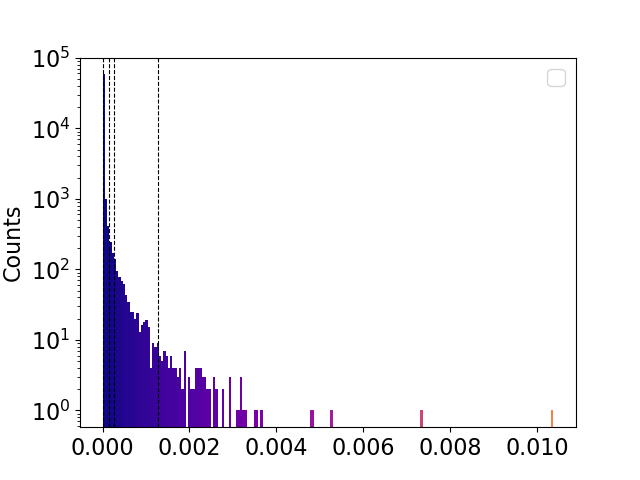

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[plt_utils.histogram] dx = 1.3835068549491765e-05


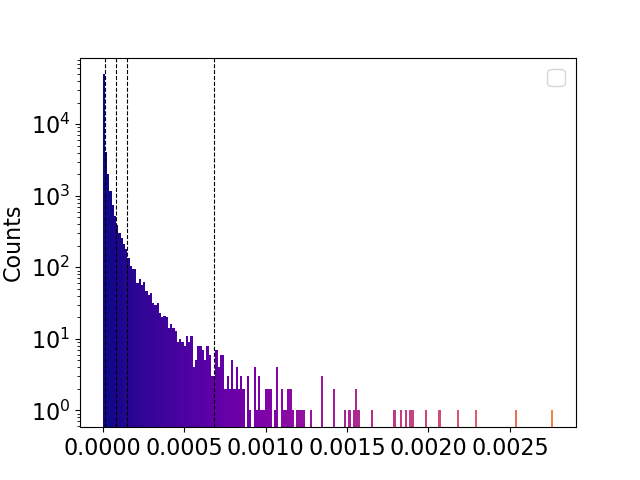

[plt_utils.histogram] dx = 7.284871385649946e-05


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


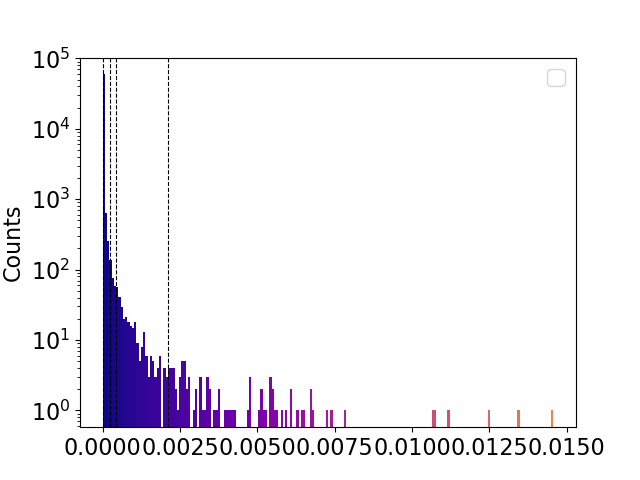

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[plt_utils.histogram] dx = 2.376080100917186e-05


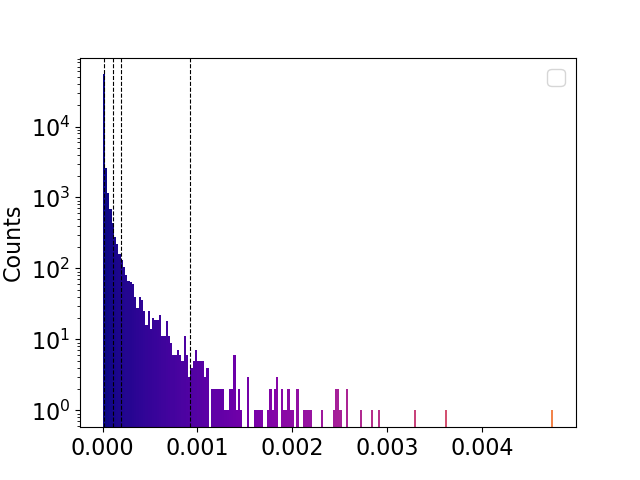

In [ ]:
from qcnico.plt_utils import histogram, get_cm

nbins = 200

for n in MO_inds:
    psi = np.abs(M[:,n])**2
    _, bins = np.histogram(psi, bins=nbins)
    centers = 0.5 * (bins[:-1] + bins[1:])
    clrs = get_cm(centers,'plasma')
    fig, ax = plt.subplots() 
    fig, ax = histogram(psi,nbins=nbins,plt_objs=(fig,ax),usetex=False,log_counts=True,show=False,plt_kwargs={'color':clrs})
    ax.axvline(x=np.mean(psi),ymin=0,ymax=1,c='k',lw=0.8,ls='--')
    ax.axvline(x=np.mean(psi)+np.std(psi),ymin=0,ymax=1,c='k',lw=0.8,ls='--')
    ax.axvline(x=np.mean(psi)+2*np.std(psi),ymin=0,ymax=1,c='k',lw=0.8,ls='--')
    ax.axvline(x=np.mean(psi)+10*np.std(psi),ymin=0,ymax=1,c='k',lw=0.8,ls='--')
    plt.legend()
    plt.show()

nclusts =  1
cc_clrs =  ['#1f77b4']
cluster_clrs =  ['#1f77b4']


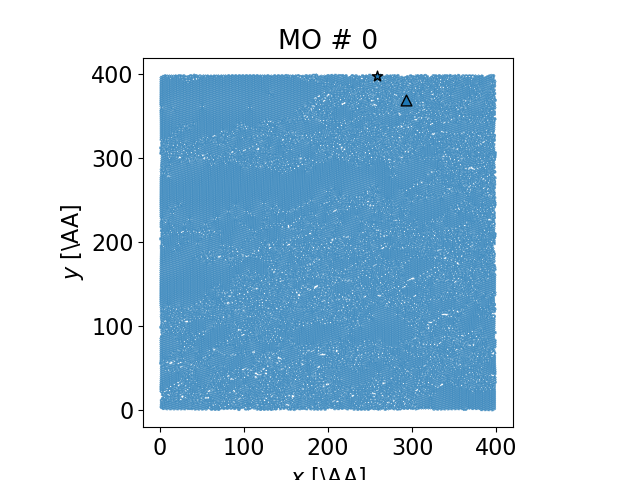

nclusts =  7
cc_clrs =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']
cluster_clrs =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']


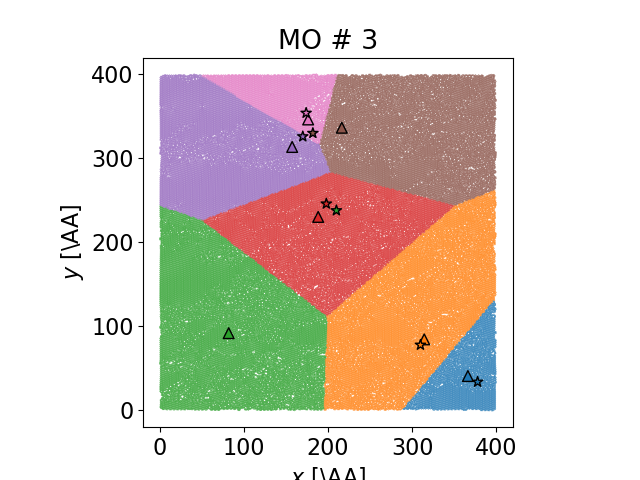

nclusts =  3
cc_clrs =  ['#1f77b4', '#ff7f0e', '#2ca02c']
cluster_clrs =  ['#1f77b4', '#ff7f0e', '#2ca02c']


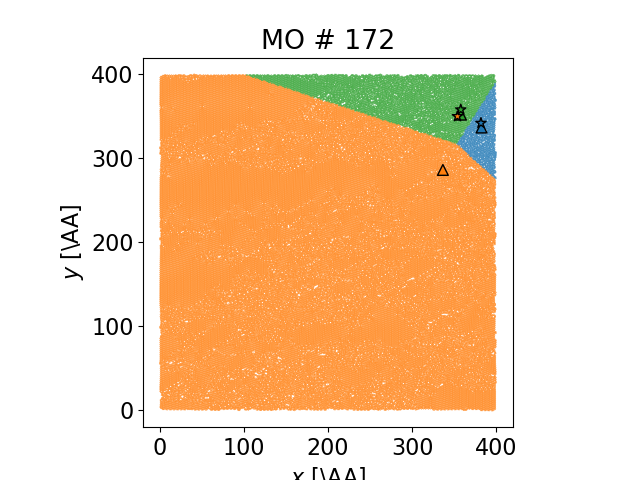

nclusts =  2
cc_clrs =  ['#1f77b4', '#ff7f0e']
cluster_clrs =  ['#1f77b4', '#ff7f0e']


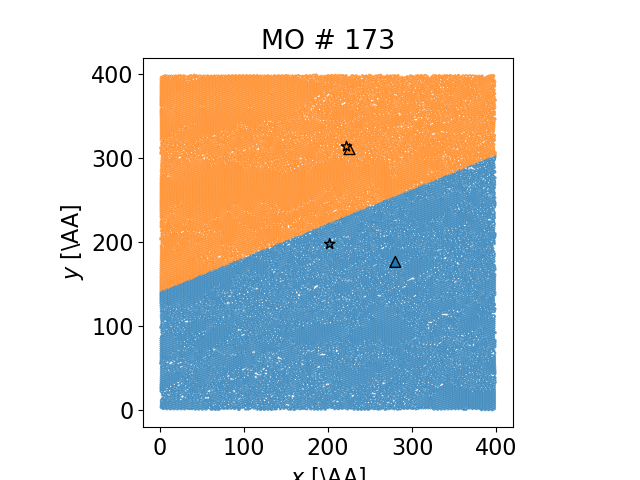

In [ ]:
from MOs2sites import assign_AOs
from matplotlib import rcParams

cyc = rcParams['axes.prop_cycle'] #default plot colours are stored in this `cycler` type object

pos = pos[:,:2]

for n in MO_inds:
    site_inds = (ii == n).nonzero()[0]
    nsites  = site_inds.shape[0]
    sites = cc[site_inds]
    colors = [d['color'] for d in list(cyc[0:nsites])]
    psi = M[:,n]
    psi2 = np.abs(psi) ** 2
    threshold

    cluster_centers,labels = assign_AOs(pos,sites,psi=psi)

    atom_clrs  = [colors[k] for k in labels]
    cluster_clrs = colors
    cc_clrs = colors
    
    print('cc_clrs = ',cc_clrs)
    print('cluster_clrs = ',cluster_clrs)
    
    fig,ax = plt.subplots()

    fig, ax = plot_atoms(pos,dotsize=0.1,show=False,plt_objs=(fig,ax),usetex=False,colour=atom_clrs,zorder=1)
    ax.scatter(*cluster_centers.T,marker='^',c=cluster_clrs,edgecolors='k',s=60.0,zorder=2)
    ax.scatter(*sites.T,marker='*',c=cc_clrs,edgecolors='k',s=60.0,zorder=3)
    ax.set_title(f'MO # {n}')
    plt.show()


[[-3 -3]
 [-3 -2]
 [-3 -1]
 [-3  0]
 [-3  1]
 [-3  2]
 [-3  3]
 [-2 -2]
 [-2 -1]
 [-2  0]
 [-2  1]
 [-2  2]
 [-2  3]
 [-1 -1]
 [-1  0]
 [-1  1]
 [-1  2]
 [-1  3]
 [ 0  0]
 [ 0  1]
 [ 0  2]
 [ 0  3]
 [ 1  1]
 [ 1  2]
 [ 1  3]
 [ 2  2]
 [ 2  3]
 [ 3  3]]
[[-3 -3]
 [-3 -2]
 [-3 -1]
 [-3  0]
 [-3  1]
 [-3  2]
 [-3  3]
 [-2 -2]
 [-2 -1]
 [-2  0]
 [-2  1]
 [-2  2]
 [-2  3]
 [-1 -1]
 [-1  0]
 [-1  1]
 [-1  2]
 [-1  3]
 [ 0  0]
 [ 0  1]
 [ 0  2]
 [ 0  3]
 [ 1  1]
 [ 1  2]
 [ 1  3]
 [ 2  2]
 [ 2  3]
 [ 3  3]]


AttributeError: 'tuple' object has no attribute 'T'

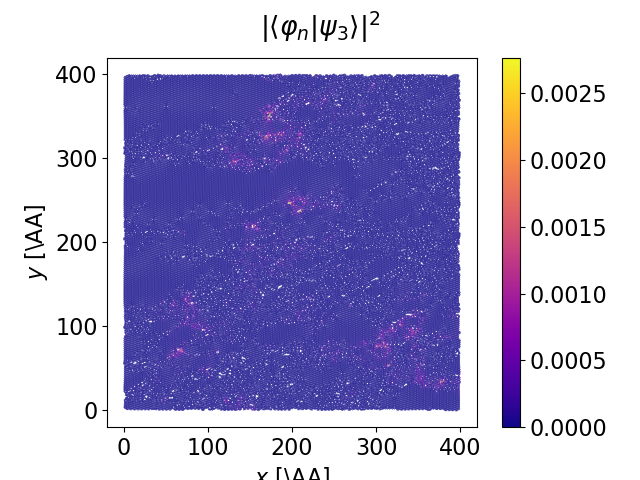

In [ ]:
from MOs2sites import get_MO_loc_centers_opt

n = 3

sites = get_MO_loc_centers_opt(pos, M, n, nbins=100,threshold_ratio=0.5, shift_centers=False,min_distance=16)
sites2 = get_MO_loc_centers_opt(pos, M, n, nbins=100,threshold_ratio=0.0, shift_centers=False,min_distance=16)

fig, ax = plt.subplots()

fig, ax = plot_MO(pos,M,n,dotsize=0.1,show=False,plt_objs=(fig,ax),usetex=False)
ax.scatter(*sites.T,marker='o',c=None,edgecolors='r',ms=100.0,lw=1.0)
ax.scatter(*sites2.T,marker='*',c='r',ms=50.0)

plt.show()


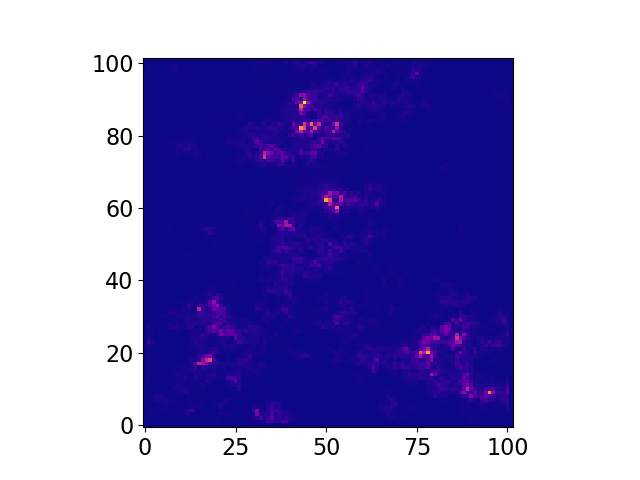

In [ ]:
from qcnico.qchemMAC import gridifyMO
# from scipy.ndimage import 


rho, xedges, yedges = gridifyMO(pos, M, 3, 100, True)
fig, ax = plt.subplots()

ax.imshow(rho, origin='lower',cmap='plasma')
plt.show()
